# História das Olimpíadas  
_(créditos ao prof. Rafael Moreira)_

Após um ano de atraso por conta da pandemia de Covid-19, as atenções do mundo todo se voltaram para Tóquio, no Japão, para acompanhar mais uma edição das Olimpíadas.

No Brasil não foi diferente, e muitos se uniram para torcer por nossos atletas em diferentes competições, tanto em esportes onde o Brasil já possui tradição quanto em novos esportes.

Vamos aproveitar o clima para estudar um pouco das Olimpíadas! Utilizaremos um _dataset_ com 120 anos de dados históricos das Olimpíadas, cobrindo desde os jogos de Atenas 1896 até Rio 2016. 

Faça o download do _dataset_ em https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results e carregue o arquivo ```athlete_events.csv``` para um DataFrame utilizando Pandas. Aproveite para explorar seu DataFrame e se familiarizar com a sua estrutura. 

OBS: Fique à vontade para acrescentar mais células Python conforme necessário em qualquer etapa do exercício.

In [2]:
import pandas as pd

df_olimpiadas = pd.read_csv('athlete_events.csv', sep=',')

## 1. O Brasil nas Olimpíadas

Vamos começar estudando o desempenho do nossos próprio país. Gere um DataFrame novo contendo apenas as informações sobre atletas brasileiros.

In [3]:
# Visualizando o DataFrame
df_olimpiadas.head(8)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


In [4]:
# Obtendo um novo df apenas com as informações dos brasileiros (Brazil, Brazil-1, Brazil-2)
df_olimpiadas_brasileiros = df_olimpiadas[df_olimpiadas.NOC == 'BRA']
df_olimpiadas_brasileiros.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
665,386,Alexandre Abeid,M,22.0,194.0,92.0,Brazil,BRA,1972 Summer,1972,Summer,Munich,Volleyball,Volleyball Men's Volleyball,NaN
666,386,Alexandre Abeid,M,26.0,194.0,92.0,Brazil,BRA,1976 Summer,1976,Summer,Montreal,Volleyball,Volleyball Men's Volleyball,NaN
668,388,Abel Carlos da Silva Braga,M,19.0,190.0,73.0,Brazil,BRA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN
781,451,Diana Monteiro Abla,F,21.0,175.0,75.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Water Polo,Water Polo Women's Water Polo,NaN
1005,565,Glauclio Serro Abreu,M,26.0,185.0,75.0,Brazil,BRA,2004 Summer,2004,Summer,Athina,Boxing,Boxing Men's Middleweight,NaN


### Medalhistas

Vamos focar um pouco nos casos de sucesso do Brasil. Use o seu DataFrame anterior para filtrar apenas informações sobre **medalhistas** brasileiros. 

**DICA:** observe como a coluna ```Medal``` é representada quando o atleta não ganhou medalha.

In [5]:
df_olimpiadas_brasileiros_medalhistas = df_olimpiadas_brasileiros.dropna(subset=['Medal'])
df_olimpiadas_brasileiros_medalhistas.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
1651,918,Ademir Roque Kaefer,M,24.0,179.0,74.0,Brazil,BRA,1984 Summer,1984,Summer,Los Angeles,Football,Football Men's Football,Silver
1652,918,Ademir Roque Kaefer,M,28.0,179.0,74.0,Brazil,BRA,1988 Summer,1988,Summer,Seoul,Football,Football Men's Football,Silver
1668,925,Adenzia Aparecida Ferreira da Silva,F,25.0,187.0,65.0,Brazil,BRA,2012 Summer,2012,Summer,London,Volleyball,Volleyball Women's Volleyball,Gold
1733,966,Daniel Adler,M,26.0,180.0,72.0,Brazil,BRA,1984 Summer,1984,Summer,Los Angeles,Sailing,Sailing Mixed Three Person Keelboat,Silver
1856,1020,Adriana Aparecida dos Santos,F,25.0,180.0,61.0,Brazil,BRA,1996 Summer,1996,Summer,Atlanta,Basketball,Basketball Women's Basketball,Silver


### Verão vs Inverno

Você deve ter notado que temos duas categorias distintas de jogos olímpicos, representados pela estação: temos os jogos de verão e os jogos de inverno, que ocorrem de maneira intercalada.

Agora que já conhecemos os medalhistas brasileiros, resposta: quantos atletas brasileiros receberam medalha nos jogos de verão e quantos receberam nos jogos de inverno?

In [6]:
# Jogos de verão
qnt_medalhas = df_olimpiadas_brasileiros_medalhistas.groupby('Season')['Medal'].count()
qnt_medalhas_inverno = df_olimpiadas_brasileiros_medalhistas[df_olimpiadas_brasileiros_medalhistas['Season'] == 'Winter']['Season'].count()
print('Medalhas Brasileiras - Jogos de verão:', qnt_medalhas['Summer'])
print('Medalhas Brasileiras - Jogos de inverno:', qnt_medalhas_inverno)

Medalhas Brasileiras - Jogos de verão: 475
Medalhas Brasileiras - Jogos de inverno: 0


Os jogos de verão são bem mais populares do que os jogos de inverno no Brasil. Portanto, deste ponto em diante iremos focar apenas nos jogos de verão. Descarte de seu DataFrame os dados dos jogos de inverno.



In [7]:
index_jogos_de_inverno = df_olimpiadas_brasileiros[df_olimpiadas_brasileiros['Season'] == 'Winter'].index
df_olimpiadas_brasileiros.drop(index=index_jogos_de_inverno, inplace=True)
df_olimpiadas_brasileiros

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
665,386,Alexandre Abeid,M,22.0,194.0,92.0,Brazil,BRA,1972 Summer,1972,Summer,Munich,Volleyball,Volleyball Men's Volleyball,NaN
666,386,Alexandre Abeid,M,26.0,194.0,92.0,Brazil,BRA,1976 Summer,1976,Summer,Montreal,Volleyball,Volleyball Men's Volleyball,NaN
668,388,Abel Carlos da Silva Braga,M,19.0,190.0,73.0,Brazil,BRA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN
781,451,Diana Monteiro Abla,F,21.0,175.0,75.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Water Polo,Water Polo Women's Water Polo,NaN
1005,565,Glauclio Serro Abreu,M,26.0,185.0,75.0,Brazil,BRA,2004 Summer,2004,Summer,Athina,Boxing,Boxing Men's Middleweight,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268652,134400,"Maria Jos ""Zz"" Bertolotti",F,26.0,190.0,NaN,Brazil,BRA,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Women's Basketball,NaN
269745,134976,Sieglinda Lenk Zigler,F,17.0,NaN,NaN,Brazil,BRA,1936 Summer,1936,Summer,Berlin,Swimming,Swimming Women's 100 metres Backstroke,NaN
269899,135037,Moacir Zimmermann,M,32.0,184.0,70.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 20 kilometres Walk,NaN
270478,135289,Zzimo Alves Calazans,M,20.0,NaN,NaN,Brazil,BRA,1952 Summer,1952,Summer,Helsinki,Football,Football Men's Football,NaN


### Atletas do Brasil

Vamos conhecer um pouco melhor nossos atletas. Descubra a altura e peso médio de nossos medalhistas.

In [8]:
altura_media = df_olimpiadas_brasileiros_medalhistas.dropna(subset=['Height'])['Height'].mean().round(1)
peso_medio = df_olimpiadas_brasileiros_medalhistas.dropna(subset=['Weight'])['Weight'].mean().round()
print('Atura média:', altura_media, '\nPeso médio:', peso_medio)

Atura média: 182.5 
Peso médio: 77.0


Imaginamos que diferentes esportes podem beneficiar diferentes tipos físicos, certo? Então refaça a análise anterior, mas obtendo os valores médios **por esporte**.

In [9]:
df_altura_peso_media_medalhistas = df_olimpiadas_brasileiros_medalhistas.groupby('Sport')[['Height', 'Weight']].mean().round(1).reset_index()
df_altura_peso_media_medalhistas
# pd.pivot_table(data=df_olimpiadas_brasileiros, columns='Sport', values=['Height', 'Weight'], aggfunc={'Height':np.mean, 'Weight':np.mean})

,Sport,Height,Weight
0,Athletics,181.0,74.6
1,Basketball,185.6,78.5
2,Beach Volleyball,184.9,78.2
3,Boxing,170.0,64.0
4,Canoeing,175.0,83.2
5,Equestrianism,179.7,75.0
6,Football,175.8,70.0
7,Gymnastics,162.8,63.8
8,Judo,176.7,86.3
9,Modern Pentathlon,166.0,55.0


Será que os dados acima influenciaram no interesse geral dos atletas pelo esporte ou realmente impactaram no desempenho deles? Podemos tentar descobrir se há algum tipo de correlação.

Você ainda possui o dataframe original contendo todos os atletas brasileiros, incluindo os sem medalha? Obtenha os valores médios de peso e altura por esporte daquele dataframe e compare-o com os dos medalhistas. Há alguma diferença significativa em algum esporte?

In [10]:
index_esportes = df_altura_peso_media_medalhistas['Sport'].tolist()
df_altura_peso_media_bra = df_olimpiadas_brasileiros[df_olimpiadas_brasileiros['Sport'].isin(index_esportes)].dropna(subset=['Height', 'Weight']).groupby('Sport')[['Height', 'Weight']].mean().round(1).reset_index()
df_altura_peso_media_bra

,Sport,Height,Weight
0,Athletics,176.2,67.8
1,Basketball,191.5,85.9
2,Beach Volleyball,185.7,78.6
3,Boxing,172.0,64.1
4,Canoeing,177.8,77.4
5,Equestrianism,178.3,72.3
6,Football,173.3,67.8
7,Gymnastics,157.3,52.5
8,Judo,173.9,80.3
9,Modern Pentathlon,170.5,60.7


Existe um detalhe importante passando batido até agora em nossa análise: as categorias esportivas costumam ser divididas por gênero justamente por conta de diferenças físicas entre homens e mulheres que poderiam influenciar no desempenho. Compare a altura e peso médios de atletas brasileiros por esporte segmentado por sexo.

In [11]:
df_olimpiadas_brasileiros_sexo = df_olimpiadas_brasileiros_medalhistas.groupby(['Sex', 'Sport'])['Height', 'Weight'].mean().round(1).reset_index()
pd.pivot(data=df_olimpiadas_brasileiros_sexo, index='Sport', columns='Sex', values=['Height', 'Weight'])

/var/folders/5p/2r7q1zqd2gsbltdbvzswxj5m0000gn/T/ipykernel_2994/767156290.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_olimpiadas_brasileiros_sexo = df_olimpiadas_brasileiros_medalhistas.groupby(['Sex', 'Sport'])['Height', 'Weight'].mean().round(1).reset_index()


Height        Weight      
Sex                    F      M      F     M
Sport                                       
Athletics          173.0  181.3   61.0  75.1
Basketball         183.4  187.6   71.6  86.0
Beach Volleyball   175.0  195.6   64.1  93.4
Boxing             167.0  170.8   60.0  65.0
Canoeing             NaN  175.0    NaN  83.2
Equestrianism        NaN  179.7    NaN  75.0
Football           167.0  179.0   60.7  73.3
Gymnastics           NaN  162.8    NaN  63.8
Judo               168.2  179.3   63.6  93.4
Modern Pentathlon  166.0    NaN   55.0   NaN
Sailing            170.5  183.1   63.2  82.7
Shooting             NaN  175.0    NaN  69.0
Swimming           165.0  190.4   52.0  83.3
Taekwondo          178.0  190.0   69.0  90.0
Volleyball         183.4  195.4   71.0  87.9

Qual foi (ou quais foram) o maior medalhista brasileiro em quantidade total de medalhas?

In [12]:
df_olimpiadas_brasileiros_medalhistas.groupby('Name')['Medal'].count().sort_values(ascending=False).head()

Name
Robert Scheidt                        5
Torben Schmidt Grael                  5
Gustavo Frana Borges                  4
Srgio "Escadinha" Dutra dos Santos    4
Rodrigo "Rodrigo" Santana             3
Name: Medal, dtype: int64

E o(s) maior(es) em quantidade de medalhas de ouro?

In [13]:
df_olimpiadas_brasileiros_medalhistas[df_olimpiadas_brasileiros_medalhistas['Medal'] == 'Gold'].groupby('Name')['Medal'].count().sort_values(ascending=False).head(15)

Name
Fabiana "Fabi" Alvim de Oliveira                      2
Torben Schmidt Grael                                  2
Fabiana Marcelino Claudino                            2
Giovane Farinazzo Gvio                                2
Paula Renata Marques Pequeno                          2
Sheilla Tavares de Castro Blassioli                   2
Srgio "Escadinha" Dutra dos Santos                    2
Robert Scheidt                                        2
Thasa Daher de Menezes                                2
Jaqueline Maria "Jaque" Pereira de Carvalho Endres    2
Marcelo Bastos Ferreira                               2
Maurcio Camargo Lima                                  2
Adhemar Ferreira da Silva                             2
Maurren Higa Maggi                                    1
Rafael Alcntara do Nascimento                         1
Name: Medal, dtype: int64

Qual esporte rendeu mais medalhas de ouro para o Brasil? E qual rendeu mais medalhas no total?

**DICA:** tome muito cuidado nessa análise: cada **evento esportivo** rende 1 medalha. Por exemplo, quando a equipe de futebol vence, isso é considerado 1 medalha, mesmo tendo cerca de 20 atletas medalhistas na equipe. 

In [14]:
# Medalhas de ouro por esporte
df_ouro_esporte = df_olimpiadas_brasileiros_medalhistas[df_olimpiadas_brasileiros_medalhistas['Medal'] == 'Gold'].groupby(['Year', 'Sport'])['Sport'].count()
df_ouro_esporte
df_ouro_esporte.groupby('Sport').count().sort_values(ascending=False)

Sport
Athletics           5
Volleyball          5
Judo                4
Sailing             4
Beach Volleyball    3
Boxing              1
Equestrianism       1
Football            1
Gymnastics          1
Shooting            1
Swimming            1
Name: Sport, dtype: int64

In [15]:
# Medalhas por esporte geral
df_medalhas_geral = df_olimpiadas_brasileiros_medalhistas.groupby(['Year', 'Sport', 'Medal'])['Sport'].count()
df_medalhas_geral
df_medalhas_geral.groupby('Sport').count().sort_values(ascending=False)

Sport
Athletics            16
Sailing              14
Judo                 13
Swimming             13
Beach Volleyball     12
Volleyball           10
Football              8
Basketball            5
Boxing                4
Shooting              4
Equestrianism         3
Gymnastics            3
Canoeing              2
Taekwondo             2
Modern Pentathlon     1
Name: Sport, dtype: int64

Cada "categoria" dentro de um esporte é considerado um evento. Por exemplo, dentro de "atletismo", temos uma competição de 100m masculina, uma de 100m feminino, um revezamento 4 x 100m masculino, um revezamento 4 x 100m feminino, uma competição de 400m masculino, uma de 400m feminino, uma maratona masculina, uma maratona feminina, e assim sucessivamente.

Sabendo disso, qual evento esportivo mais rendeu medalhas de ouro para o Brasil? E total de medalhas?

In [16]:
# Evento que mais rendeu medalhas de ouro
df_evento_ouro = df_olimpiadas_brasileiros_medalhistas[df_olimpiadas_brasileiros_medalhistas['Medal'] == 'Gold'].groupby(['Event', 'Year'])['Medal'].count()
df_evento_ouro.groupby('Event').count().sort_values(ascending=False).head()

Event
Volleyball Men's Volleyball                3
Volleyball Women's Volleyball              2
Athletics Men's Triple Jump                2
Beach Volleyball Men's Beach Volleyball    2
Sailing Mixed One Person Dinghy            2
Name: Medal, dtype: int64

Para finalizar sobre o Brasil: obtenha o total de medalhas de ouro, prata, bronze e total por ano.

In [17]:
df_medalhas_ano = df_olimpiadas_brasileiros_medalhistas.groupby(['Year', 'Medal', 'Event'])['Medal'].count()
df_medalhas_ano = pd.DataFrame(df_medalhas_ano.groupby(['Year', 'Medal']).count()).rename(columns={'Medal': 'Medals_Count'}).reset_index(level='Medal')
total = df_medalhas_ano.groupby('Year').sum()['Medals_Count']
df_medalhas_ano['Total'] = total
df_medalhas_ano.reset_index().groupby(['Year', 'Total', 'Medal', 'Medals_Count']).count()


Empty DataFrame
Columns: []
Index: [(1920, 3, Bronze, 1), (1920, 3, Gold, 1), (1920, 3, Silver, 1), (1948, 1, Bronze, 1), (1952, 3, Bronze, 2), (1952, 3, Gold, 1), (1956, 1, Gold, 1), (1960, 2, Bronze, 2), (1964, 1, Bronze, 1), (1968, 3, Bronze, 2), (1968, 3, Silver, 1), (1972, 2, Bronze, 2), (1976, 2, Bronze, 2), (1980, 4, Bronze, 2), (1980, 4, Gold, 2), (1984, 8, Bronze, 2), (1984, 8, Gold, 1), (1984, 8, Silver, 5), (1988, 6, Bronze, 3), (1988, 6, Gold, 1), (1988, 6, Silver, 2), (1992, 3, Gold, 2), (1992, 3, Silver, 1), (1996, 15, Bronze, 9), (1996, 15, Gold, 3), (1996, 15, Silver, 3), (2000, 12, Bronze, 6), (2000, 12, Silver, 6), (2004, 10, Bronze, 3), (2004, 10, Gold, 5), (2004, 10, Silver, 2), (2008, 16, Bronze, 9), (2008, 16, Gold, 3), (2008, 16, Silver, 4), (2012, 17, Bronze, 9), (2012, 17, Gold, 3), (2012, 17, Silver, 5), (2016, 19, Bronze, 6), (2016, 19, Gold, 7), (2016, 19, Silver, 6)]

## 2. O mundo nos jogos de verão

Vamos agora analisar um pouquinho do que aconteceu nas Olimpíadas de verão em todo o mundo.

Retome o DataFrame original e descarte as informações sobre os jogos de inverno.

In [18]:
df_olimpiadas_verao = df_olimpiadas[df_olimpiadas['Season'] == 'Summer']
df_olimpiadas_verao.tail()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
271106,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,Argentina,ARG,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,NaN
271107,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN
271108,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN
271109,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,NaN
271110,135568,Olga Igorevna Zyuzkova,F,33.0,171.0,69.0,Belarus,BLR,2016 Summer,2016,Summer,Rio de Janeiro,Basketball,Basketball Women's Basketball,NaN


Obtenha a lista de todos os esportes já disputados nas olimpíadas de verão.

In [19]:
list_esportes = df_olimpiadas_verao.groupby('Sport').count().index.tolist()
list_esportes

['Aeronautics',
 'Alpinism',
 'Archery',
 'Art Competitions',
 'Athletics',
 'Badminton',
 'Baseball',
 'Basketball',
 'Basque Pelota',
 'Beach Volleyball',
 'Boxing',
 'Canoeing',
 'Cricket',
 'Croquet',
 'Cycling',
 'Diving',
 'Equestrianism',
 'Fencing',
 'Figure Skating',
 'Football',
 'Golf',
 'Gymnastics',
 'Handball',
 'Hockey',
 'Ice Hockey',
 'Jeu De Paume',
 'Judo',
 'Lacrosse',
 'Modern Pentathlon',
 'Motorboating',
 'Polo',
 'Racquets',
 'Rhythmic Gymnastics',
 'Roque',
 'Rowing',
 'Rugby',
 'Rugby Sevens',
 'Sailing',
 'Shooting',
 'Softball',
 'Swimming',
 'Synchronized Swimming',
 'Table Tennis',
 'Taekwondo',
 'Tennis',
 'Trampolining',
 'Triathlon',
 'Tug-Of-War',
 'Volleyball',
 'Water Polo',
 'Weightlifting',
 'Wrestling']

Obtenha a lista de todas as modalidades esportivas já disputadas nas olimpíadas de verão.

In [20]:
list_eventos = df_olimpiadas_verao.groupby('Event').count().index.tolist()
list_eventos

['Aeronautics Mixed Aeronautics',
 'Alpinism Mixed Alpinism',
 "Archery Men's Au Chapelet, 33 metres",
 "Archery Men's Au Chapelet, 50 metres",
 "Archery Men's Au Cordon Dore, 33 metres",
 "Archery Men's Au Cordon Dore, 50 metres",
 "Archery Men's Championnat Du Monde",
 "Archery Men's Continental Style",
 "Archery Men's Double American Round",
 "Archery Men's Double York Round",
 "Archery Men's Individual",
 "Archery Men's Pole Archery, Large Birds, Individual",
 "Archery Men's Pole Archery, Large Birds, Team",
 "Archery Men's Pole Archery, Small Birds, Individual",
 "Archery Men's Pole Archery, Small Birds, Team",
 "Archery Men's Sur La Perche a La Herse",
 "Archery Men's Sur La Perche a La Pyramide",
 "Archery Men's Target Archery, 28 metres, Individual",
 "Archery Men's Target Archery, 28 metres, Team",
 "Archery Men's Target Archery, 33 metres, Individual",
 "Archery Men's Target Archery, 33 metres, Team",
 "Archery Men's Target Archery, 50 metres, Individual",
 "Archery Men's Tar

Obtenha a lista de todos os países que já disputaram olimpíadas.

In [21]:
list_paises = df_olimpiadas_verao.groupby('NOC').count().index.tolist()
list_paises

['AFG',
 'AHO',
 'ALB',
 'ALG',
 'AND',
 'ANG',
 'ANT',
 'ANZ',
 'ARG',
 'ARM',
 'ARU',
 'ASA',
 'AUS',
 'AUT',
 'AZE',
 'BAH',
 'BAN',
 'BAR',
 'BDI',
 'BEL',
 'BEN',
 'BER',
 'BHU',
 'BIH',
 'BIZ',
 'BLR',
 'BOH',
 'BOL',
 'BOT',
 'BRA',
 'BRN',
 'BRU',
 'BUL',
 'BUR',
 'CAF',
 'CAM',
 'CAN',
 'CAY',
 'CGO',
 'CHA',
 'CHI',
 'CHN',
 'CIV',
 'CMR',
 'COD',
 'COK',
 'COL',
 'COM',
 'CPV',
 'CRC',
 'CRO',
 'CRT',
 'CUB',
 'CYP',
 'CZE',
 'DEN',
 'DJI',
 'DMA',
 'DOM',
 'ECU',
 'EGY',
 'ERI',
 'ESA',
 'ESP',
 'EST',
 'ETH',
 'EUN',
 'FIJ',
 'FIN',
 'FRA',
 'FRG',
 'FSM',
 'GAB',
 'GAM',
 'GBR',
 'GBS',
 'GDR',
 'GEO',
 'GEQ',
 'GER',
 'GHA',
 'GRE',
 'GRN',
 'GUA',
 'GUI',
 'GUM',
 'GUY',
 'HAI',
 'HKG',
 'HON',
 'HUN',
 'INA',
 'IND',
 'IOA',
 'IRI',
 'IRL',
 'IRQ',
 'ISL',
 'ISR',
 'ISV',
 'ITA',
 'IVB',
 'JAM',
 'JOR',
 'JPN',
 'KAZ',
 'KEN',
 'KGZ',
 'KIR',
 'KOR',
 'KOS',
 'KSA',
 'KUW',
 'LAO',
 'LAT',
 'LBA',
 'LBR',
 'LCA',
 'LES',
 'LIB',
 'LIE',
 'LTU',
 'LUX',
 'MAD',
 'MAL',


Qual atleta foi o maior medalhista (em medalhas totais) da história das olimpíadas de verão?

In [22]:
df_olimpiadas_verao_medalhistas = df_olimpiadas_verao.dropna(subset=['Medal'])
df_olimpiadas_verao_medalhistas.groupby('Name')['Name'].count().sort_values(ascending=False).head(1)

Name
Michael Fred Phelps, II    28
Name: Name, dtype: int64

Qual atleta foi o maior medalhista de ouro da história das olimpíadas de verão?

In [23]:
series_atletas_ouro = df_olimpiadas_verao_medalhistas[df_olimpiadas_verao_medalhistas['Medal'] == 'Gold'].groupby('Name')['Name'].count().sort_values(ascending=False)
series_atletas_ouro.head(1)

Name
Michael Fred Phelps, II    23
Name: Name, dtype: int64

Qual país foi o maior medalhista de ouro da história das olimpíadas de verão? Lembre-se da questão do evento esportivo, para não considerar múltiplas medalhas para um mesmo evento (ex: uma equipe de futebol fazendo parecer que mais de 20 medalhas foram distribuídas).

In [24]:
df_pais_ouro = df_olimpiadas_verao_medalhistas[df_olimpiadas_verao_medalhistas['Medal'] == 'Gold'].groupby(['Event', 'Year', 'NOC'])['NOC'].count()
df_pais_ouro.groupby('NOC').count().sort_values(ascending=False).head(1)

NOC
USA    1035
Name: NOC, dtype: int64

Qual país foi o maior medalhista em medalhas totais na história das olimpíadas de verão?

In [25]:
df_pais_medalhas = df_olimpiadas_verao_medalhistas.groupby(['Event', 'Year', 'NOC'])['NOC'].count()
df_pais_medalhas.groupby('NOC').count().sort_values(ascending=False).head(1)

NOC
USA    1877
Name: NOC, dtype: int64

Obtenha o total de medalhas de ouro, prata e total por edição das Olimpíadas de verão. Lembre-se da questão do evento esportivo.

In [26]:
df_medalhas_verao = df_olimpiadas_verao_medalhistas.groupby(['Year', 'Medal', 'Event'])['Medal'].count()
df_medalhas_verao = pd.DataFrame(df_medalhas_verao.groupby(['Year', 'Medal']).count()).rename(columns={'Medal': 'Medals_Count'}).reset_index(level='Medal')
total = df_medalhas_verao.groupby('Year').sum()['Medals_Count']
df_medalhas_verao['Total'] = total
df_medalhas_verao.reset_index().groupby(['Year', 'Total', 'Medal', 'Medals_Count']).count()


Empty DataFrame
Columns: []
Index: [(1896, 116, Bronze, 32), (1896, 116, Gold, 43), (1896, 116, Silver, 41), (1900, 255, Bronze, 80), (1900, 255, Gold, 89), (1900, 255, Silver, 86), (1904, 275, Bronze, 88), (1904, 275, Gold, 95), (1904, 275, Silver, 92), (1906, 219, Bronze, 71), (1906, 219, Gold, 74), (1906, 219, Silver, 74), (1908, 309, Bronze, 97), (1908, 309, Gold, 109), (1908, 309, Silver, 103), (1912, 309, Bronze, 100), (1912, 309, Gold, 106), (1912, 309, Silver, 103), (1920, 443, Bronze, 138), (1920, 443, Gold, 154), (1920, 443, Silver, 151), (1924, 387, Bronze, 128), (1924, 387, Gold, 129), (1924, 387, Silver, 130), (1928, 355, Bronze, 119), (1928, 355, Gold, 118), (1928, 355, Silver, 118), (1932, 370, Bronze, 120), (1932, 370, Gold, 125), (1932, 370, Silver, 125), (1936, 420, Bronze, 140), (1936, 420, Gold, 140), (1936, 420, Silver, 140), (1948, 435, Bronze, 147), (1948, 435, Gold, 143), (1948, 435, Silver, 145), (1952, 444, Bronze, 146), (1952, 444, Gold, 149), (1952, 444, Silver, 149), (1956, 448, Bronze, 148), (1956, 448, Gold, 151), (1956, 448, Silver, 149), (1960, 447, Bronze, 149), (1960, 447, Gold, 150), (1960, 447, Silver, 148), (1964, 486, Bronze, 160), (1964, 486, Gold, 163), (1964, 486, Silver, 163), (1968, 514, Bronze, 172), (1968, 514, Gold, 172), (1968, 514, Silver, 170), (1972, 575, Bronze, 190), (1972, 575, Gold, 193), (1972, 575, Silver, 192), (1976, 593, Bronze, 197), (1976, 593, Gold, 198), (1976, 593, Silver, 198), (1980, 606, Bronze, 201), (1980, 606, Gold, 203), (1980, 606, Silver, 202), (1984, 657, Bronze, 220), (1984, 657, Gold, 221), (1984, 657, Silver, 216), (1988, 707, Bronze, 236), (1988, 707, Gold, 237), (1988, 707, Silver, 234), (1992, 764, Bronze, 253), (1992, 764, Gold, 257), (1992, 764, Silver, 254), (1996, 811, Bronze, 269), (1996, 811, Gold, 271), (1996, 811, Silver, 271), (2000, 897, Bronze, 299), (2000, 897, Gold, 299), (2000, 897, Silver, 299), (2004, 901, Bronze, 300), (2004, 901, Gold, 301), (2004, 901, Silver, 300), (2008, 905, Bronze, 301), (2008, 905, Gold, 302), (2008, 905, Silver, 302), (2012, 904, Bronze, 300), (2012, 904, Gold, 302), (2012, 904, Silver, 302), (2016, 915, Bronze, 305), (2016, 915, Gold, 306), (2016, 915, Silver, 304)]

[87 rows x 0 columns]

## 3. Brasil vs Mundo

Para finalizar, vamos fazer algumas comparações entre Brasil e mundo. Qual o ranking do Brasil em cada edição das olimpíadas? Lembrando que o ranking é ordenado por medalhas de ouro.

In [27]:
# Ouro = 3 pontos | Prata = 2 pontos | Bronze = 1 ponto -> Esquece...
def calcular_pontos(pais):
    dic = {}
    valor = 0
    for i in pais.values:
        if i[2] == 'Gold':
            valor = i[3]*3
        # elif i[2] == 'Silver':
        #     valor = i[3]*2
        # else:
        #     valor = i[3]
        if i[0] in dic:
            if i[1] in dic[i[0]]:
                dic[i[0]][i[1]] += valor
            else:
                dic[i[0]][i[1]] = valor
        else:
            dic[i[0]] = {i[1]: valor}
    return dic

df_medalhas_ano = df_olimpiadas_verao_medalhistas.groupby(['Year', 'Medal', 'Event', 'NOC'])['Medal'].count()
df_medalhas_ano = pd.DataFrame(df_medalhas_ano.groupby(['Year', 'Medal', 'NOC']).count()).rename(columns={'Medal': 'Medals_Count'}).reset_index(level='Medal')
total = df_medalhas_ano.groupby('Year').sum()['Medals_Count']
df_medalhas_ano['Total'] = total
df_medalhas_ano.reset_index(inplace=True)
df_paises = df_medalhas_ano[['NOC', 'Year', 'Medal', 'Medals_Count']]

df_pontos = pd.DataFrame(calcular_pontos(df_paises)).reset_index()
df_rank = pd.DataFrame()

for i in range(len(df_pontos)):
    df_rank[df_pontos.loc[i, 'index']] = df_pontos.iloc[i]


df_rank.drop('index', inplace=True)

for ano in df_rank[:-1]:
    pais = df_rank[ano].sort_values(ascending=False)
    df_rank[ano] = pais.keys()
    
df_rank.reset_index(inplace=True, drop=True)

# Reordenando as colunas
df_rank = df_rank.reindex(sorted(df_rank.columns), axis=1)

def buscar_ranking_pais(pais, ano=None):
    if ano and ano in df_rank.columns:
        print(f'{ano} -> {df_rank.index[df_rank[ano] == pais].values[0]+1}')
    else:
        for ano in df_rank.columns:
            print(f'{ano} -> {df_rank.index[df_rank[ano] == pais].values[0]+1}º')

buscar_ranking_pais('BRA')

1896 -> 30º
1900 -> 30º
1904 -> 30º
1906 -> 30º
1908 -> 30º
1912 -> 30º
1920 -> 14º
1924 -> 41º
1928 -> 42º
1932 -> 38º
1936 -> 42º
1948 -> 36º
1952 -> 21º
1956 -> 31º
1960 -> 29º
1964 -> 34º
1968 -> 25º
1972 -> 28º
1976 -> 39º
1980 -> 17º
1984 -> 19º
1988 -> 24º
1992 -> 37º
1996 -> 22º
2000 -> 55º
2004 -> 16º
2008 -> 23º
2012 -> 22º
2016 -> 14º


Compare o maior medalhista em ouros do Brasil com o maior medalhista em ouros do mundo.

In [28]:
colunas = ['NOC', 'Name', 'Sex', 'Year', 'Event', 'Age', 'Height', 'Weight']

series_atletas_br_ouro = df_olimpiadas_brasileiros_medalhistas[df_olimpiadas_brasileiros_medalhistas['Medal'] == 'Gold'].groupby('Name')['Medal'].count().sort_values(ascending=False)
brasileiro = df_olimpiadas_brasileiros_medalhistas[df_olimpiadas_brasileiros_medalhistas['Name'] == series_atletas_br_ouro.index[0]].groupby(colunas)[colunas].count().drop(columns=colunas).reset_index()

mundo = df_olimpiadas_verao_medalhistas[df_olimpiadas_verao_medalhistas['Name'] == series_atletas_ouro.index[0]].groupby(colunas)[colunas].count().drop(columns=colunas).reset_index()
pd.concat([brasileiro, mundo], axis=1).fillna('')


,NOC,Name,Sex,Year,Event,Age,Height,Weight,NOC,Name,Sex,Year,Event,Age,Height,Weight
0,BRA,"Fabiana ""Fabi"" Alvim de Oliveira",F,2008.0,Volleyball Women's Volleyball,28.0,169.0,59.0,USA,"Michael Fred Phelps, II",M,2004,Swimming Men's 100 metres Butterfly,19.0,193.0,91.0
1,BRA,"Fabiana ""Fabi"" Alvim de Oliveira",F,2012.0,Volleyball Women's Volleyball,32.0,169.0,59.0,USA,"Michael Fred Phelps, II",M,2004,Swimming Men's 200 metres Butterfly,19.0,193.0,91.0
2,,,,,,,,,USA,"Michael Fred Phelps, II",M,2004,Swimming Men's 200 metres Freestyle,19.0,193.0,91.0
3,,,,,,,,,USA,"Michael Fred Phelps, II",M,2004,Swimming Men's 200 metres Individual Medley,19.0,193.0,91.0
4,,,,,,,,,USA,"Michael Fred Phelps, II",M,2004,Swimming Men's 4 x 100 metres Freestyle Relay,19.0,193.0,91.0
5,,,,,,,,,USA,"Michael Fred Phelps, II",M,2004,Swimming Men's 4 x 100 metres Medley Relay,19.0,193.0,91.0
6,,,,,,,,,USA,"Michael Fred Phelps, II",M,2004,Swimming Men's 4 x 200 metres Freestyle Relay,19.0,193.0,91.0
7,,,,,,,,,USA,"Michael Fred Phelps, II",M,2004,Swimming Men's 400 metres Individual Medley,19.0,193.0,91.0
8,,,,,,,,,USA,"Michael Fred Phelps, II",M,2008,Swimming Men's 100 metres Butterfly,23.0,193.0,91.0
9,,,,,,,,,USA,"Michael Fred Phelps, II",M,2008,Swimming Men's 200 metres Butterfly,23.0,193.0,91.0


Compare o maior medalhista em total de medalhas do Brasil com o maior medalhista em total de medalhas do mundo.

In [29]:
medalhista_brasileiro = df_olimpiadas_brasileiros_medalhistas.groupby('Name')['Name'].count().sort_values(ascending=False).index[0]
medalhista_brasileiro = df_olimpiadas_brasileiros_medalhistas[df_olimpiadas_brasileiros_medalhistas['Name'] == medalhista_brasileiro][colunas]

medalhista_mundo = df_olimpiadas_verao_medalhistas.groupby('Name')['Name'].count().sort_values(ascending=False).index[0]
medalhista_mundo = df_olimpiadas_verao_medalhistas[df_olimpiadas_verao_medalhistas['Name'] == medalhista_mundo][colunas]

pd.concat([medalhista_brasileiro, medalhista_mundo], axis=1).fillna('').reset_index(drop=True)

,NOC,Name,Sex,Year,Event,Age,Height,Weight,NOC,Name,Sex,Year,Event,Age,Height,Weight
0,,,,,,,,,USA,"Michael Fred Phelps, II",M,2004.0,Swimming Men's 200 metres Freestyle,19.0,193.0,91.0
1,,,,,,,,,USA,"Michael Fred Phelps, II",M,2004.0,Swimming Men's 4 x 100 metres Freestyle Relay,19.0,193.0,91.0
2,,,,,,,,,USA,"Michael Fred Phelps, II",M,2004.0,Swimming Men's 4 x 200 metres Freestyle Relay,19.0,193.0,91.0
3,,,,,,,,,USA,"Michael Fred Phelps, II",M,2004.0,Swimming Men's 100 metres Butterfly,19.0,193.0,91.0
4,,,,,,,,,USA,"Michael Fred Phelps, II",M,2004.0,Swimming Men's 200 metres Butterfly,19.0,193.0,91.0
5,,,,,,,,,USA,"Michael Fred Phelps, II",M,2004.0,Swimming Men's 200 metres Individual Medley,19.0,193.0,91.0
6,,,,,,,,,USA,"Michael Fred Phelps, II",M,2004.0,Swimming Men's 400 metres Individual Medley,19.0,193.0,91.0
7,,,,,,,,,USA,"Michael Fred Phelps, II",M,2004.0,Swimming Men's 4 x 100 metres Medley Relay,19.0,193.0,91.0
8,,,,,,,,,USA,"Michael Fred Phelps, II",M,2008.0,Swimming Men's 200 metres Freestyle,23.0,193.0,91.0
9,,,,,,,,,USA,"Michael Fred Phelps, II",M,2008.0,Swimming Men's 4 x 100 metres Freestyle Relay,23.0,193.0,91.0


Compare o maior medalhista em ouros do Brasil com o maior medalhista do mundo no mesmo esporte.

In [30]:
colunas = ['NOC', 'Name', 'Sex', 'Year', 'Sport', 'Age', 'Height', 'Weight']
nome_br = series_atletas_br_ouro.index[0]
esporte_br = df_olimpiadas_brasileiros_medalhistas[df_olimpiadas_brasileiros_medalhistas['Name'] == nome_br][colunas]

df_olimpiadas_verao_medalhistas_ouro = df_olimpiadas_verao_medalhistas[(df_olimpiadas_verao_medalhistas['Medal'] == 'Gold')]
evento_mundo = df_olimpiadas_verao_medalhistas_ouro[df_olimpiadas_verao_medalhistas_ouro['Sport'] == esporte_br['Sport'].values[0]]
nome_mundo = evento_mundo.groupby('Name')['Name'].count().sort_values(ascending=False).index[0]

esporte_mundo = df_olimpiadas_verao_medalhistas_ouro[df_olimpiadas_verao_medalhistas_ouro['Name'] == nome_mundo][colunas]

pd.concat([esporte_br, esporte_mundo]).fillna('').reset_index(drop=True).groupby(colunas).count()


Empty DataFrame
Columns: []
Index: [(BRA, Fabiana "Fabi" Alvim de Oliveira, F, 2008, Volleyball, 28.0, 169.0, 59.0), (BRA, Fabiana "Fabi" Alvim de Oliveira, F, 2012, Volleyball, 32.0, 169.0, 59.0), (CUB, Alejandrina Mireya Luis Hernndez, F, 1992, Volleyball, 24.0, 176.0, 68.0), (CUB, Alejandrina Mireya Luis Hernndez, F, 1996, Volleyball, 28.0, 176.0, 68.0), (CUB, Alejandrina Mireya Luis Hernndez, F, 2000, Volleyball, 33.0, 176.0, 68.0)]

Compare o maior medalhista em total de medalhas do Brasil com o maior medalhista do mundo no mesmo esporte.

In [31]:
nome_br = df_olimpiadas_brasileiros_medalhistas.groupby('Name')['Name'].count().sort_values(ascending=False).index[0]
esporte_br = df_olimpiadas_brasileiros_medalhistas[df_olimpiadas_brasileiros_medalhistas['Name'] == nome_br][colunas]

nome_mundo = df_olimpiadas_verao_medalhistas[df_olimpiadas_verao_medalhistas['Sport'] == esporte_br['Sport'].values[0]].groupby('Name')['Name'].count().sort_values(ascending=False).index[0]
esporte_mundo = df_olimpiadas_verao_medalhistas[df_olimpiadas_verao_medalhistas['Name'] == nome_mundo][colunas]

pd.concat([esporte_br, esporte_mundo], axis='rows').reset_index(drop=True).groupby(colunas).count()

Empty DataFrame
Columns: []
Index: [(BRA, Robert Scheidt, M, 1996, Sailing, 23.0, 188.0, 76.0), (BRA, Robert Scheidt, M, 2000, Sailing, 27.0, 188.0, 76.0), (BRA, Robert Scheidt, M, 2004, Sailing, 31.0, 188.0, 76.0), (BRA, Robert Scheidt, M, 2008, Sailing, 35.0, 188.0, 76.0), (BRA, Robert Scheidt, M, 2012, Sailing, 39.0, 188.0, 76.0), (GBR, Charles Benedict "Ben" Ainslie, M, 1996, Sailing, 19.0, 183.0, 90.0), (GBR, Charles Benedict "Ben" Ainslie, M, 2000, Sailing, 23.0, 183.0, 90.0), (GBR, Charles Benedict "Ben" Ainslie, M, 2004, Sailing, 27.0, 183.0, 90.0), (GBR, Charles Benedict "Ben" Ainslie, M, 2008, Sailing, 31.0, 183.0, 90.0), (GBR, Charles Benedict "Ben" Ainslie, M, 2012, Sailing, 35.0, 183.0, 90.0)]

Calcule o percentual de medalhas de ouro, prata e bronze que o Brasil ganhou em cada olimpíada.

,Medal,% Medal
0,Bronze,40.21
2,Silver,36.84
1,Gold,22.95


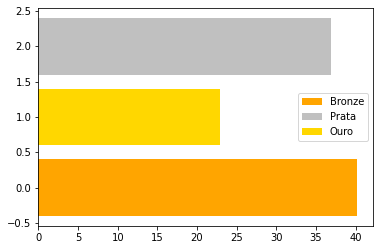

In [32]:
medalhas_percent = df_olimpiadas_brasileiros_medalhistas.groupby('Medal')['Medal'].count()/df_olimpiadas_brasileiros_medalhistas['Medal'].count()*100
medalhas_percent = pd.DataFrame(medalhas_percent).rename(columns={'Medal': '% Medal'}).reset_index().round(2).sort_values('% Medal', ascending=False)

import matplotlib.pyplot as plt

test = plt.barh(medalhas_percent['% Medal'].index, medalhas_percent['% Medal'], color=['Orange', 'Silver', 'Gold']);

plt.legend(test, ('Bronze', 'Prata', 'Ouro'));
medalhas_percent